In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
import os
import pandas_datareader.data as web
import datetime as dt

In [2]:
#We use the DataReader to import the file into Python. 
#We use Yahoo! finance to do this 
#We just specify the start and end dates for the stocks we want
start = dt.datetime(2000,1,1)
end = dt.datetime(2018,12,31)

In [3]:
#To search for the name of the stock, search --> "Company Name" NASDAQ
#GRPN stands for 'Groupon'
#The second argument, "Yahoo" is from where we want to import the data. 
groupon = web.DataReader('GRPN' , 'yahoo', start, end)

In [5]:
#Now, let us save the file as a CSV & import back into the System
os.chdir(r'C:\Users\salil\Desktop')
groupon.to_csv('groupon.csv')
groupon = pd.read_csv('groupon.csv')

In [6]:
groupon['Date'] = pd.to_datetime(groupon['Date'], format = "%Y-%m-%d")

In [7]:
groupon.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-11-04,31.139999,25.900000,28.000000,26.110001,49813000,26.110001
1,2011-11-07,27.780001,24.590000,27.440001,25.969999,9516000,25.969999
2,2011-11-08,26.209999,24.750000,26.200001,24.900000,4266800,24.900000
3,2011-11-09,24.559999,22.760000,23.510000,24.020000,4544100,24.020000
4,2011-11-10,24.959999,23.200001,24.129999,24.410000,2344000,24.410000


In [8]:
groupon.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1794,2018-12-24,2.92,2.81,2.86,2.87,6634200,2.87
1795,2018-12-26,3.15,2.89,2.91,3.14,7420800,3.14
1796,2018-12-27,3.18,3.03,3.08,3.15,5058100,3.15
1797,2018-12-28,3.22,3.10,3.16,3.20,4061800,3.20
1798,2018-12-31,3.27,3.17,3.21,3.20,5869600,3.20


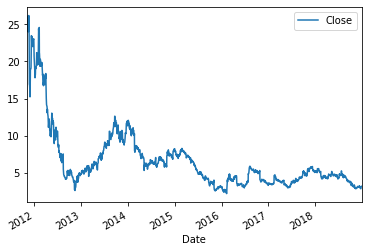

In [9]:
#Let us plot a simple graph of the Closing price for each day over the years
groupon.plot(x = 'Date', y = 'Close', style = '-')
plt.show()

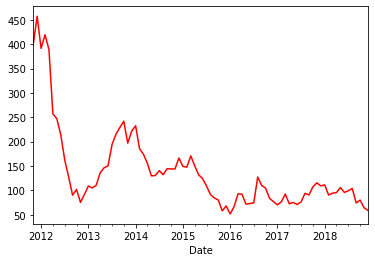

In [21]:
#Let us check for each month every year when the average price is highest
#We save the original dataset in a different name for our convinience
grpn2 = groupon
grpn2.index = grpn2['Date']
grpn2['Close'].resample('M').sum().plot(style ='-', color = 'red')

In [11]:
#As we see from the graph above, there is a lot of variation up until 2016
#Let's consider the stock prices 2016 onwards
grpn_new = groupon[groupon['Date'] > '2016']

In [12]:
#Let's consider only the Closing price since we are more interested in prediction
close_grp = grpn_new[['Date', 'Close']].copy()

In [13]:
close_grp.head()

,Date,Close
1045,2016-01-04,3.00
1046,2016-01-05,3.13
1047,2016-01-06,3.03
1048,2016-01-07,2.86
1049,2016-01-08,2.78


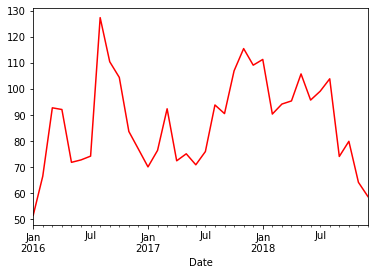

In [23]:
close_grp.index = close_grp['Date']
close_grp['Close'].resample('M').sum().plot(style ='-', color = 'red')